# Multi Layer Perceptron

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch.optim as optim
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
import torch.nn.functional as F
import seaborn as sns
import tensorflow as tf
import random


A)

In [3]:
df = pd.read_csv('F:/Term 7/Neural Networks/Attachments/Q4_Dataset/houses.csv')
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

B)

In [7]:
count_nan_in_df = df.isnull().sum()
print (count_nan_in_df)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


C) 'sqft_living' has the most correlation with 'price'.

In [84]:
corrM = df.corr()
corrM

,id,year,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.010128,-0.011708,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
year,0.010128,1.000000,-0.782389,0.003576,-0.009838,-0.026596,-0.029038,0.005468,-0.022315,-0.004165,...,-0.030387,-0.023823,-0.015687,0.003507,-0.023707,0.001189,-0.029212,0.000270,-0.021734,-0.000085
month,-0.011708,-0.782389,1.000000,-0.010081,-0.001533,0.007392,0.011810,-0.002369,0.014005,0.008132,...,0.008376,0.009872,0.006035,-0.006226,0.012827,-0.000171,0.014961,-0.008134,0.002449,0.003546
price,-0.016762,0.003576,-0.010081,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,-0.009838,-0.001533,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,...,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,-0.026596,0.007392,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,...,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,-0.029038,0.011810,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.005468,-0.002369,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,-0.022315,0.014005,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,-0.004165,0.008132,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703


D)

id - price graph

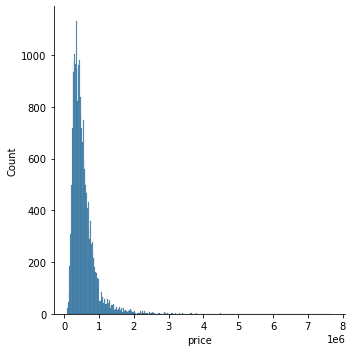

In [18]:
sns.displot(data=df, x="price")

sqft_living - price graph

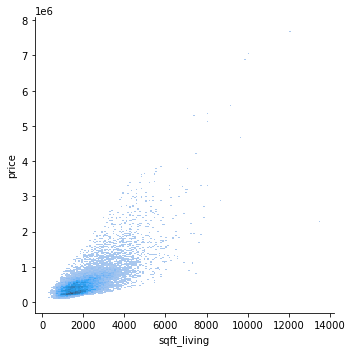

In [22]:
sns.displot(data=df, x="sqft_living", y = 'price')

E)

In [4]:
dateMain = df.date.values.tolist()
year = np.zeros(len(dateMain))
month = np.zeros(len(dateMain))
i = 0
for i in range(len(dateMain)):
    temp = dateMain[i]
    month[i] = temp[4:6]
    year[i] = temp[0:4]
    
df.drop('date', inplace=True, axis=1)
df.insert(1, "year", year, True)
df.insert(2, "month", month, True)

In [51]:
X = df.drop('price', axis=1).values
y = df['price'].values
df

,id,year,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014.0,10.0,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014.0,12.0,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015.0,2.0,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014.0,12.0,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015.0,2.0,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014.0,5.0,360000.0,3,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015.0,2.0,400000.0,4,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014.0,6.0,402101.0,2,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015.0,1.0,400000.0,3,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


F)

In [45]:


x = df.drop(columns='price').to_numpy()
y = df['price'].to_numpy()
x.shape, y.shape


x_train, x_test, y_train, y_test = train_test_split(x, np.log(y), test_size=0.2, random_state=42)
scaler = MinMaxScaler()
scaler.fit(x_train)
# scale the training dataset
train_x = scaler.transform(x_train)

# scale the test dataset
test_x = scaler.transform(x_test)


print(y_train.shape)
print(len(y))




(17290,)
21613


H)

In [71]:
from time import time
class TrainMLP:
    def __init__(self, units=1024, activationFunction="relu", 
                 optimizer="SGD", numLayers=4, lossFunction='mean_squared_error') -> None:
        self.optimizer = optimizer
        self.units = units
        self.activationFunction = activationFunction
        self.numLayers = numLayers
        self.lossFunction = lossFunction
        self.model = self.MLP()
        self.history = None
        self.training_time = None
        
    def MLP(self):
        model = tf.keras.Sequential([tf.keras.layers.Normalization()])
        model.add(tf.keras.layers.LayerNormalization())
        for n in range(self.numLayers):
            model.add(tf.keras.layers.Dense(self.units / 2**n))
            model.add(tf.keras.layers.LayerNormalization())
            model.add(tf.keras.layers.Activation(self.activationFunction))
            model.add(tf.keras.layers.Dropout(0.1))
        model.add(tf.keras.layers.Dense(1))
        
        model.compile(optimizer = self.optimizer, loss = self.lossFunction, metrics = ['mean_squared_error', 'mean_absolute_error'])
        return model
    
    def train(self, x_train, y_train, sizeOfBatch=32, epochs=50):
        self.sizeOfBatch = sizeOfBatch
        earlyStopping = tf.keras.callbacks.EarlyStopping (monitor = 'val_loss', verbose = 1, patience = 10, mode = 'min', restore_best_weights = True)
        start = time()
        self.history = self.model.fit (x_train, y_train, batch_size = sizeOfBatch, epochs = epochs, verbose=1, validation_split = 0.15, callbacks = [earlyStopping],)
        self.training_time = time() - start
    
    def plot_history(self):
        fig = plt.figure(figsize=(14, 3))
        metrics = ['mean_squared_error', 'mean_absolute_error']
        for n, metric in enumerate(metrics):
            plt.subplot(1, 3, n+1)
            plt.plot(self.history.epoch, self.history.history[metric], label='Train')
            plt.plot(self.history.epoch, self.history.history[f"val_{metric}"], linestyle="--", label='Validation')
            plt.xlabel('Epoch')
            plt.ylabel(metric)
            plt.title(metric)
        plt.legend()
        plt.show()
    def evaluate(self, x_test, y_test):
        preds = self.model.predict(x_test)
        plt.title('Targets & Predictions')
        plt.scatter(y_test, preds)
        plt.xlabel('Target')
        plt.ylabel('Prediction')
        plt.show()
        return preds

In [66]:
x_test = np.zeros(5)
y_test_main = np.zeros(5)
i = random.choices(range(len(test_x)), k= 5)
for j in range(len(i)):
    index = i[j]
    y_test_main[j] = y_test[index]

x_test = test_x[i]

Epoch 1/100
230/230 [==============================] - 10s 35ms/step - loss: 1.2062 - mean_squared_error: 1.2062 - mean_absolute_error: 0.4961 - val_loss: 0.0863 - val_mean_squared_error: 0.0863 - val_mean_absolute_error: 0.2262
Epoch 2/100
230/230 [==============================] - 7s 32ms/step - loss: 0.1827 - mean_squared_error: 0.1827 - mean_absolute_error: 0.3388 - val_loss: 0.0676 - val_mean_squared_error: 0.0676 - val_mean_absolute_error: 0.1953
Epoch 3/100
230/230 [==============================] - 7s 33ms/step - loss: 0.1626 - mean_squared_error: 0.1626 - mean_absolute_error: 0.3179 - val_loss: 0.0649 - val_mean_squared_error: 0.0649 - val_mean_absolute_error: 0.1936
Epoch 4/100
230/230 [==============================] - 7s 32ms/step - loss: 0.1595 - mean_squared_error: 0.1595 - mean_absolute_error: 0.3157 - val_loss: 0.0582 - val_mean_squared_error: 0.0582 - val_mean_absolute_error: 0.1795
Epoch 5/100
230/230 [==============================] - 7s 32ms/step - loss: 0.1482 - me

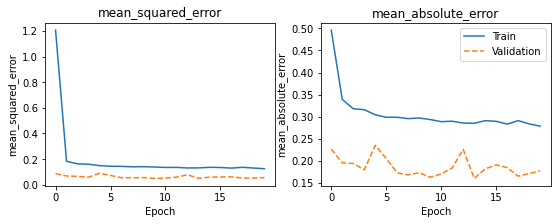

1/1 [==============================] - 0s 280ms/step


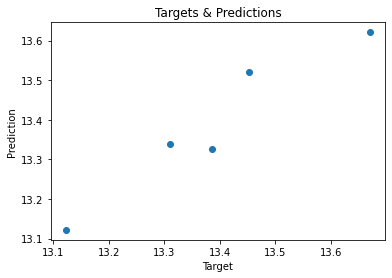

In [78]:
res = np.zeros(5)
for numLayer in [3]:
    trainerMLP = TrainMLP(
        units=2048,
        activationFunction="relu", 
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
        numLayers=numLayer
    )
    trainerMLP.train(train_x, y_train, sizeOfBatch=64, epochs=100)
    trainerMLP.plot_history()
    res = trainerMLP.evaluate(x_test, y_test_main)
    

In [79]:
print(y_test_main - res.T)

[[-0.02900588 -0.0700385   0.05967089  0.00051813  0.04940534]]


In [ ]:
x_test = test_x[0:6]
y_test = y_test[0:6]
for numLayer in [3]:
    trainerMLP = TrainMLP(
        units = 2048,
        activationFunction = "relu", 
        optimizer = tf.keras.optimizers.SGD(learning_rate=0.001), 
        numLayers = numLayer
    )
    trainerMLP.train(train_x, y_train, sizeOfBatch=64, epochs=200)
    trainerMLP.plot_history()
    trainerMLP.evaluate(x_test, y_test)
